In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-09-07 10:47:48.504573: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-07 10:47:48.920028: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-07 10:47:48.951446: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
from importlib import reload

In [5]:
reload(postprocess)
from postprocess import *
reload(plot)
from plot import *
reload(QuasinormalMode) 
from QuasinormalMode import *
reload(spheroidal)
from spheroidal import *

In [339]:
import pandas as pd
from matplotlib import ticker 

In [340]:
runname = "normal2_prodB1"
df = pd.read_csv(f"../../pickle/data_frame/{runname}.csv")
df_prime = pd.read_csv(f"../../pickle/data_frame/normal2_prodB3.csv")

In [341]:
df_full = pd.concat([df, df_prime])

In [342]:
df = classify_modes(df_full)

In [343]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Text(0, 0.5, '$\\chi_{\\rm rem}$')

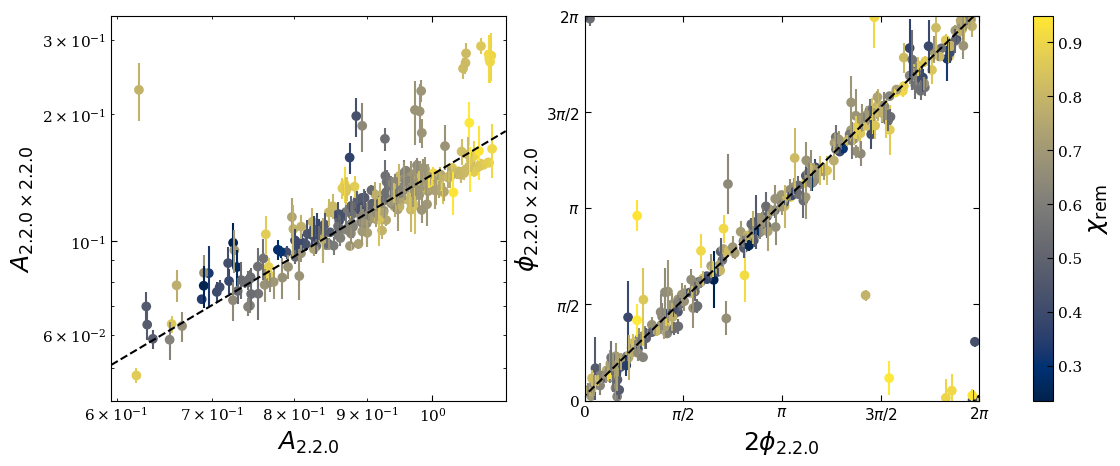

In [351]:
quad_l, quad_m = 4, 4
lin_l, lin_m = 2, 2
pro_quad_mode = "2.2.0x2.2.0"
pro_lin_mode = "2.2.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode = qnm_string_m_reverse(pro_lin_mode)

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

beta = plot_mode_vs_mode_amplitude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic",
                            fig = fig, ax = axs[0], colorbar = False, fit = True,
                            skip_num = [156])
xsfit = np.linspace(*axs[0].get_xlim(), num = 100)
# ysfit = linfunc2([-0.829738], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit, c = "k", ls = "--")
# ysfit2 = linfunc2([np.log10(0.19)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit2, c = "k", ls = ":")
# ysfit3 = linfunc2([np.log10(0.17)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit3, c = "k", ls = "-.")
# ysfit4 = linfunc2([np.log10(0.1637)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit4, c = "k", ls = "-")
axs[0].plot()

sc = plot_mode_vs_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                             lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                             fit_type = "quadratic",
                             fig = fig, ax = axs[1], colorbar = False, return_sc = True,
                             fit = True,
                             skip_num = [156])
# xsfit = np.linspace(0, 2*np.pi, num = 100)
# ysfit = xsfit + 0.105
# axs[1].plot(xsfit, ysfit, ls = "--", c = 'k')

cb = fig.colorbar(sc, ax = axs)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

plt.savefig(f"../../plots/{runname}_{pro_lin_mode}_{pro_quad_mode}.pdf", bbox_inches = "tight")

Text(33.33333333333333, 0.5, '$A_{2{,}2{,}0 \\! \\times \\! 2{,}2{,}0} / A_{2{,}2{,}0}^2$')

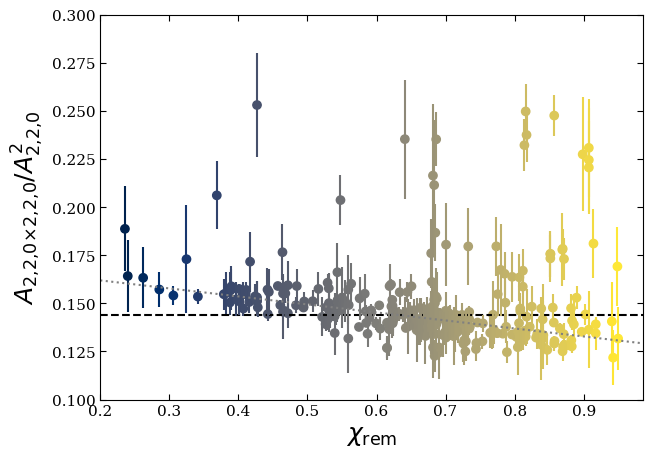

In [352]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.set_ylim(0.1, 0.3)
ax.axhline(10**beta[0], ls = "--", c = "k")
plot_mode_vs_mode_amplitude_quad_ratio(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic", fit = True,
                            fig = fig, ax = ax, colorbar = False, skip_num = [156])
ax.set_xlabel(r'$\chi_{\rm rem}$')
ax.set_ylabel(r'$A_{2{,}2{,}0 \! \times \! 2{,}2{,}0} / A_{2{,}2{,}0}^2$')

plt.savefig(f"../../plots/{runname}_{pro_lin_mode}_{pro_quad_mode}_ratio.pdf", bbox_inches = "tight")

Text(0, 0.5, '$\\chi_{\\rm rem}$')

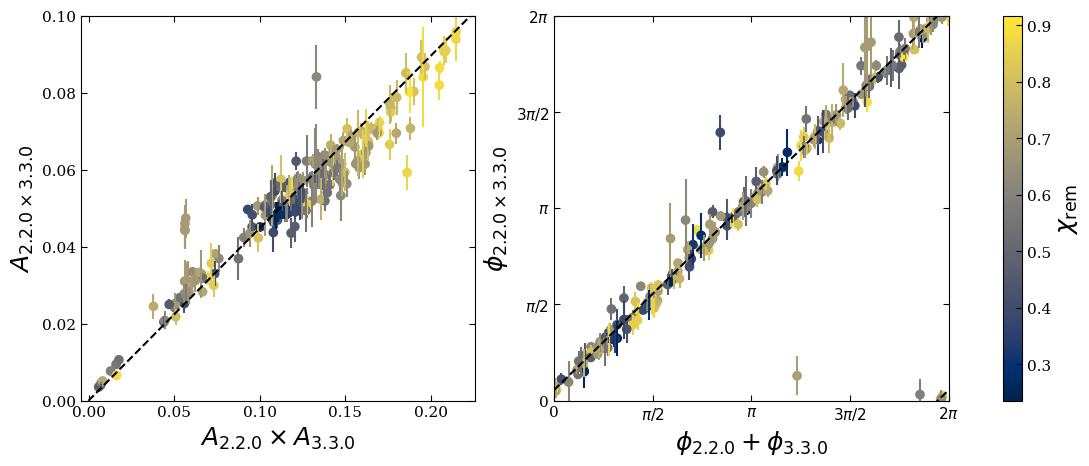

In [353]:
quad_l, quad_m = 5, 5
lin_l_1, lin_m_1 = 2, 2
lin_l_2, lin_m_2 = 3, 3
pro_quad_mode = "2.2.0x3.3.0"
pro_lin_mode_1 = "2.2.0"
pro_lin_mode_2 = "3.3.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode_1 = qnm_string_m_reverse(pro_lin_mode)
retro_lin_mode_2 = qnm_string_m_reverse(pro_lin_mode_2)

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

beta = plot_mode_vs_lin_mode_ampltiude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[0], colorbar = False, fit = True)
sc = plot_mode_vs_lin_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[1], colorbar = False, fit = True, return_sc = True)
# axs[0].set_yscale('log')
# axs[0].set_xscale('log')
axs[0].set_ylim(0.0, 0.1)
# axs[0].set_xlim(0.002, None)
cb = fig.colorbar(sc, ax = axs)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

plt.savefig(f"../../plots/{runname}_{pro_lin_mode_1}_{pro_lin_mode_2}_{pro_quad_mode}.pdf", bbox_inches = "tight")

Text(52.83333333333333, 0.5, '$A_{2{,}2{,}0 \\! \\times \\! 3{,}3{,}0} / A_{2{,}2{,}0} A_{3{,}3{,}0}$')

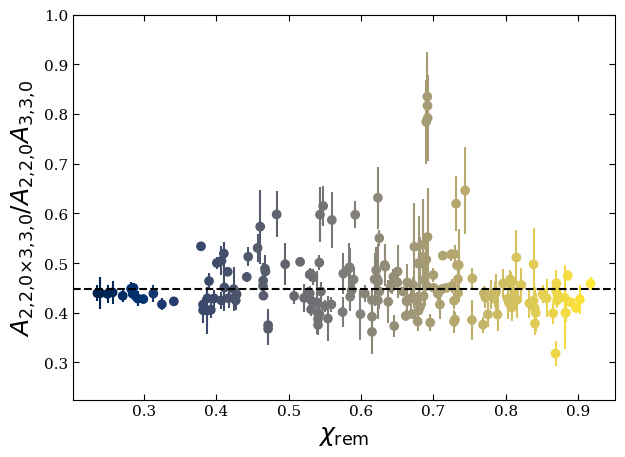

In [354]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
plot_mode_vs_lin_mode_ratio(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               fig = fig, ax = ax, colorbar = False)
ax.set_ylim(None, 1)
ax.axhline(beta[0], ls = "--", c = "k")
ax.set_xlabel(r'$\chi_{\rm rem}$')
ax.set_ylabel(r'$A_{2{,}2{,}0 \! \times \! 3{,}3{,}0} / A_{2{,}2{,}0} A_{3{,}3{,}0}$')

plt.savefig(f"../../plots/{runname}_{pro_lin_mode_1}_{pro_lin_mode_2}_{pro_quad_mode}_ratio.pdf", bbox_inches = "tight")